In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets

In [68]:
doctors = pd.read_csv('doctors.csv')
doctors

,d_id,d_surname
0,101,Anderson
1,102,Brown
2,103,Clark


In [69]:
patients = pd.read_csv('patients.csv')
patients

,p_id,p_surname,p_birthdate
0,1,Smith,2014-05-15
1,2,Johnson,1955-08-22
2,3,Williams,1970-02-10


In [70]:
operations = pd.read_csv('operations.csv')
operations

,op_id,op_name,op_price
0,201,Tooth Extraction,150
1,202,Root Canal,300
2,203,Dental Implant,500


In [71]:
appointments1 = pd.read_csv('appointments1.csv')
appointments2 = pd.read_csv('appointments2.csv')

appointments = pd.concat([appointments1, appointments2], ignore_index=True)
appointments

,ap_date,p_id,d_id,op_id,op_count
0,2024-01-01,1,101,202,2
1,2024-01-02,2,102,202,1
2,2024-01-03,3,103,203,3
3,2024-01-02,1,101,201,1
4,2024-01-04,2,102,202,2
5,2024-01-03,3,103,203,2


In [72]:
df_merged1 = pd.merge(patients, appointments, on='p_id')
df_merged2 = pd.merge(df_merged1, doctors, on='d_id')
df_merged = pd.merge(df_merged2, operations, on='op_id')
df_merged

,p_id,p_surname,p_birthdate,ap_date,d_id,op_id,op_count,d_surname,op_name,op_price
0,1,Smith,2014-05-15,2024-01-01,101,202,2,Anderson,Root Canal,300
1,2,Johnson,1955-08-22,2024-01-02,102,202,1,Brown,Root Canal,300
2,2,Johnson,1955-08-22,2024-01-04,102,202,2,Brown,Root Canal,300
3,1,Smith,2014-05-15,2024-01-02,101,201,1,Anderson,Tooth Extraction,150
4,3,Williams,1970-02-10,2024-01-03,103,203,3,Clark,Dental Implant,500
5,3,Williams,1970-02-10,2024-01-03,103,203,2,Clark,Dental Implant,500


In [73]:
# a

df_merged['total'] = df_merged['op_price'] * df_merged['op_count']
df_merged

,p_id,p_surname,p_birthdate,ap_date,d_id,op_id,op_count,d_surname,op_name,op_price,total
0,1,Smith,2014-05-15,2024-01-01,101,202,2,Anderson,Root Canal,300,600
1,2,Johnson,1955-08-22,2024-01-02,102,202,1,Brown,Root Canal,300,300
2,2,Johnson,1955-08-22,2024-01-04,102,202,2,Brown,Root Canal,300,600
3,1,Smith,2014-05-15,2024-01-02,101,201,1,Anderson,Tooth Extraction,150,150
4,3,Williams,1970-02-10,2024-01-03,103,203,3,Clark,Dental Implant,500,1500
5,3,Williams,1970-02-10,2024-01-03,103,203,2,Clark,Dental Implant,500,1000


In [74]:
money_per_operation = df_merged.groupby('op_name')['total'].sum().reset_index()
money_per_operation

,op_name,total
0,Dental Implant,2500
1,Root Canal,1500
2,Tooth Extraction,150


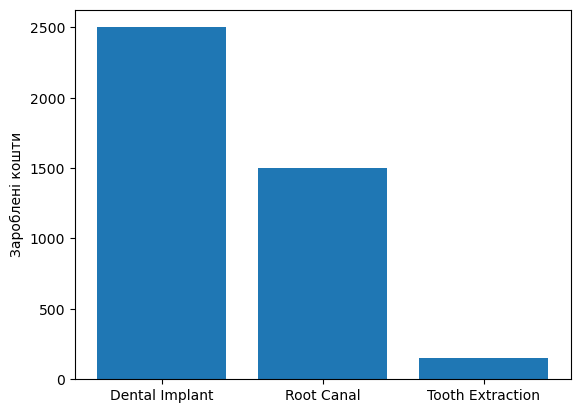

In [75]:
# б

plt.bar(money_per_operation['op_name'], money_per_operation['total'])
plt.ylabel('Зароблені кошти')
plt.show()

In [76]:
# в

def age_category(birthdate):
    age = pd.to_datetime("now").year - pd.to_datetime(birthdate).year
    if age < 16:
        return "Діти"
    elif (age >= 16) & (age <= 60):
        return "Дорослі"
    elif age > 60:
        return "Пенсіонери"

df_merged['age_category'] = df_merged['p_birthdate'].apply(age_category)
df_merged

,p_id,p_surname,p_birthdate,ap_date,d_id,op_id,op_count,d_surname,op_name,op_price,total,age_category
0,1,Smith,2014-05-15,2024-01-01,101,202,2,Anderson,Root Canal,300,600,Діти
1,2,Johnson,1955-08-22,2024-01-02,102,202,1,Brown,Root Canal,300,300,Пенсіонери
2,2,Johnson,1955-08-22,2024-01-04,102,202,2,Brown,Root Canal,300,600,Пенсіонери
3,1,Smith,2014-05-15,2024-01-02,101,201,1,Anderson,Tooth Extraction,150,150,Діти
4,3,Williams,1970-02-10,2024-01-03,103,203,3,Clark,Dental Implant,500,1500,Дорослі
5,3,Williams,1970-02-10,2024-01-03,103,203,2,Clark,Dental Implant,500,1000,Дорослі


In [77]:
age_category_wd = widgets.Dropdown(options = ["Діти", "Дорослі", "Пенсіонери"], value = "Дорослі")
display(age_category_wd)

Dropdown(index=1, options=('Діти', 'Дорослі', 'Пенсіонери'), value='Дорослі')

In [78]:
df_per_category = df_merged[df_merged['age_category'] == age_category_wd.value]
operations_count_per_category = df_per_category.groupby('p_surname')['op_count'].sum().reset_index()
operations_count_per_category

,p_surname,op_count
0,Williams,5


In [83]:
# г

doctor_operations_table = df_merged.groupby(['d_surname', 'op_name'])['op_count'].sum().reset_index()
doctor_operations_table = doctor_operations_table.sort_values(by='op_count',ascending=False)
doctor_operations_table = doctor_operations_table.groupby('d_surname').head(1)
doctor_operations_table

,d_surname,op_name,op_count
3,Clark,Dental Implant,5
2,Brown,Root Canal,3
0,Anderson,Root Canal,2
